In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [24]:
ET = pd.read_csv(r"Tobii TXTs/Angela_02_22_EPB 2,4,8 Overt/Angela_02_22_EPB 2,4,8 Overt Eye_Tracking.txt",
                 delimiter=" ", skiprows=range(5))
RD = pd.read_csv(r"Scalicity OVERT/EPB OVERT/Angela (02 22) Scalicity OVERT, EPB OVERT Remote 6.csv",
                 skiprows=range(1,4))

# ET = pd.read_csv(r"Tobii TXTs/Caitlin M_02_23_EPB 2,4,8 Overt/Caitlin M_02_23_EPB 2,4,8 Overt Eye_Tracking.txt",
#                  delimiter=" ", skiprows=range(5))
# RD = pd.read_csv(r"Scalicity OVERT/EPB OVERT/Caitlin M (02 23) Scalicity OVERT, EPB OVERT Remote 6.csv",
#                  skiprows=range(1,4))


ET.columns = ["","CPU_Time","X","Y"]
ET = ET.dropna()
ET[["CPU_Time","X","Y"]] = ET[["CPU_Time","X","Y"]].astype(float)


In [25]:
RD = RD[(np.abs(stats.zscore(RD["Reaction Time (ms)"])) < 3)]  # remove outliers
avg_resp = RD.groupby(["Eccentricity (deg)"]).mean()["Reaction Time (ms)"]
avg_resp

Eccentricity (deg)
-30    707.198923
-15    714.474569
 0     703.822808
 15    739.789350
 30    806.596623
Name: Reaction Time (ms), dtype: float64

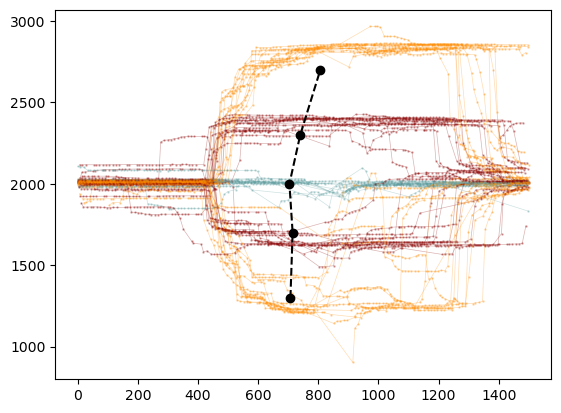

In [26]:
color_dic = {0:"cadetblue", 15:"darkred", 30:"darkorange"}

for i in range(RD.shape[0]):
    start_time = RD["CPU Uptime"].iloc[i]
    reaction_time = start_time + RD["Reaction Time (ms)"].iloc[i]
    end_time = start_time + 1500
    ecc = RD["Eccentricity (deg)"].iloc[i]

    sub_ET = ET[(ET["CPU_Time"]>=start_time) & (ET["CPU_Time"]<=end_time)]
    plt.plot(sub_ET["CPU_Time"] - start_time, sub_ET["X"],  "o-", linewidth=0.5, color=color_dic[np.abs(ecc)], markersize=0.8, alpha=0.3)

plt.plot(avg_resp, [1300, 1700, 2000, 2300, 2700],"o--",color="black")
plt.show()
